In [1]:
from google.colab import files
uploaded = files.upload()

Saving amazon mobile review.csv to amazon mobile review.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('amazon mobile review.csv')

In [4]:
df

,Unnamed: 0,customer_name,Customer_name,Rate,Review_title,User_review
0,0,MOHAMMED SOHAIL,MOHAMMED SOHAIL,4.0 out of 5 stars,Really a Good Buy in this price range in 2022,Verdict - A Good Buy in this price range in 20...
1,1,ASR,ASR,4.0 out of 5 stars,Hard to find Screen protection glass,Overall view is ok. But if I am talking about ...
2,2,Mohit khatana,Mohit khatana,4.0 out of 5 stars,Could have been better camera,Volume button on left side feels uncomfortable...
3,3,ABHISHEK TIWARI,ABHISHEK TIWARI,4.0 out of 5 stars,Battery should be atleast 5000 MH,"I only dislike battery, should have been 5000MH"
4,4,Placeholder,Placeholder,4.0 out of 5 stars,Good product as overall.....,"Nice one as it is handy to use, liked screen r..."
5,5,Aditya poul,Aditya poul,4.0 out of 5 stars,Battery training bahut jyada ho raha hai Kuchh...,The media could not be loa...
6,6,Dabblu nag,Dabblu nag,4.0 out of 5 stars,Battery could be better,Battery could be better. Front camera is not u...
7,7,Akash Chauhan,Akash Chauhan,4.0 out of 5 stars,You can go for this mobile without any hasitat...,I bought this mobile after researching a lot a...
8,8,Balram Choudry,Balram Choudry,4.0 out of 5 stars,Okay,Good
9,9,P nagarjuna,P nagarjuna,4.0 out of 5 stars,Marvelous,Super


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
#stopwords = set(STOPWORDS)
my_stopwords = stopwords.words('english')

In [7]:
def clean_text(text):
  ps = PorterStemmer()
  #text = deEmojify(text) #to remove all emojies
  text_cleaned = "".join([x for x in text if x not in string.punctuation]) #to remove punc
  text_cleaned = re.sub(' +', ' ', text_cleaned) #to remove extra white spaces
  text_cleaned = text_cleaned.lower() #to change to lower
  tokens = text_cleaned.split(" ")
  tokens = [token for token in tokens if token not in my_stopwords] #taking only words which are not in stopwords
  text_cleaned = " ".join([ps.stem(token) for token in tokens])
  return text_cleaned

In [8]:
df['Clean_reviews'] = df['User_review'].apply(clean_text)

In [9]:
df['Clean_reviews']

0    verdict good buy price rang 2022note review mo...
1    overal view ok talk screen protect glass tempe...
2    volum button left side feel uncomfort camera c...
3                                dislik batteri 5000mh
4    nice one handi use like screen refresh rate mu...
5     media could loaded\n \n\n\n\n batteri qualiti...
6    batteri could better front camera mark rare ca...
7    bought mobil research lot final observationgre...
8                                                 good
9                                                super
Name: Clean_reviews, dtype: object

In [10]:
df

,Unnamed: 0,customer_name,Customer_name,Rate,Review_title,User_review,Clean_reviews
0,0,MOHAMMED SOHAIL,MOHAMMED SOHAIL,4.0 out of 5 stars,Really a Good Buy in this price range in 2022,Verdict - A Good Buy in this price range in 20...,verdict good buy price rang 2022note review mo...
1,1,ASR,ASR,4.0 out of 5 stars,Hard to find Screen protection glass,Overall view is ok. But if I am talking about ...,overal view ok talk screen protect glass tempe...
2,2,Mohit khatana,Mohit khatana,4.0 out of 5 stars,Could have been better camera,Volume button on left side feels uncomfortable...,volum button left side feel uncomfort camera c...
3,3,ABHISHEK TIWARI,ABHISHEK TIWARI,4.0 out of 5 stars,Battery should be atleast 5000 MH,"I only dislike battery, should have been 5000MH",dislik batteri 5000mh
4,4,Placeholder,Placeholder,4.0 out of 5 stars,Good product as overall.....,"Nice one as it is handy to use, liked screen r...",nice one handi use like screen refresh rate mu...
5,5,Aditya poul,Aditya poul,4.0 out of 5 stars,Battery training bahut jyada ho raha hai Kuchh...,The media could not be loa...,media could loaded\n \n\n\n\n batteri qualiti...
6,6,Dabblu nag,Dabblu nag,4.0 out of 5 stars,Battery could be better,Battery could be better. Front camera is not u...,batteri could better front camera mark rare ca...
7,7,Akash Chauhan,Akash Chauhan,4.0 out of 5 stars,You can go for this mobile without any hasitat...,I bought this mobile after researching a lot a...,bought mobil research lot final observationgre...
8,8,Balram Choudry,Balram Choudry,4.0 out of 5 stars,Okay,Good,good
9,9,P nagarjuna,P nagarjuna,4.0 out of 5 stars,Marvelous,Super,super


In [11]:
# create a function to get the polarity
from textblob import TextBlob
def getPolarity(Clean_reviews):
  return TextBlob(Clean_reviews).sentiment.polarity
df['Polarity'] = df['Clean_reviews'].apply(getPolarity)

In [12]:
df

,Unnamed: 0,customer_name,Customer_name,Rate,Review_title,User_review,Clean_reviews,Polarity
0,0,MOHAMMED SOHAIL,MOHAMMED SOHAIL,4.0 out of 5 stars,Really a Good Buy in this price range in 2022,Verdict - A Good Buy in this price range in 20...,verdict good buy price rang 2022note review mo...,0.290644
1,1,ASR,ASR,4.0 out of 5 stars,Hard to find Screen protection glass,Overall view is ok. But if I am talking about ...,overal view ok talk screen protect glass tempe...,0.500000
2,2,Mohit khatana,Mohit khatana,4.0 out of 5 stars,Could have been better camera,Volume button on left side feels uncomfortable...,volum button left side feel uncomfort camera c...,0.250000
3,3,ABHISHEK TIWARI,ABHISHEK TIWARI,4.0 out of 5 stars,Battery should be atleast 5000 MH,"I only dislike battery, should have been 5000MH",dislik batteri 5000mh,0.000000
4,4,Placeholder,Placeholder,4.0 out of 5 stars,Good product as overall.....,"Nice one as it is handy to use, liked screen r...",nice one handi use like screen refresh rate mu...,0.550000
5,5,Aditya poul,Aditya poul,4.0 out of 5 stars,Battery training bahut jyada ho raha hai Kuchh...,The media could not be loa...,media could loaded\n \n\n\n\n batteri qualiti...,0.000000
6,6,Dabblu nag,Dabblu nag,4.0 out of 5 stars,Battery could be better,Battery could be better. Front camera is not u...,batteri could better front camera mark rare ca...,0.550000
7,7,Akash Chauhan,Akash Chauhan,4.0 out of 5 stars,You can go for this mobile without any hasitat...,I bought this mobile after researching a lot a...,bought mobil research lot final observationgre...,0.266667
8,8,Balram Choudry,Balram Choudry,4.0 out of 5 stars,Okay,Good,good,0.700000
9,9,P nagarjuna,P nagarjuna,4.0 out of 5 stars,Marvelous,Super,super,0.333333


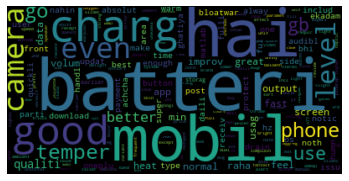

In [13]:
# Plot the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
allwords = ' '.join([i for i in df['Clean_reviews']])
wordcloud = WordCloud().generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [14]:
# Create a function to compute the negative, neutral and positive

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutal'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [15]:
df

,Unnamed: 0,customer_name,Customer_name,Rate,Review_title,User_review,Clean_reviews,Polarity,Analysis
0,0,MOHAMMED SOHAIL,MOHAMMED SOHAIL,4.0 out of 5 stars,Really a Good Buy in this price range in 2022,Verdict - A Good Buy in this price range in 20...,verdict good buy price rang 2022note review mo...,0.290644,Positive
1,1,ASR,ASR,4.0 out of 5 stars,Hard to find Screen protection glass,Overall view is ok. But if I am talking about ...,overal view ok talk screen protect glass tempe...,0.500000,Positive
2,2,Mohit khatana,Mohit khatana,4.0 out of 5 stars,Could have been better camera,Volume button on left side feels uncomfortable...,volum button left side feel uncomfort camera c...,0.250000,Positive
3,3,ABHISHEK TIWARI,ABHISHEK TIWARI,4.0 out of 5 stars,Battery should be atleast 5000 MH,"I only dislike battery, should have been 5000MH",dislik batteri 5000mh,0.000000,Neutal
4,4,Placeholder,Placeholder,4.0 out of 5 stars,Good product as overall.....,"Nice one as it is handy to use, liked screen r...",nice one handi use like screen refresh rate mu...,0.550000,Positive
5,5,Aditya poul,Aditya poul,4.0 out of 5 stars,Battery training bahut jyada ho raha hai Kuchh...,The media could not be loa...,media could loaded\n \n\n\n\n batteri qualiti...,0.000000,Neutal
6,6,Dabblu nag,Dabblu nag,4.0 out of 5 stars,Battery could be better,Battery could be better. Front camera is not u...,batteri could better front camera mark rare ca...,0.550000,Positive
7,7,Akash Chauhan,Akash Chauhan,4.0 out of 5 stars,You can go for this mobile without any hasitat...,I bought this mobile after researching a lot a...,bought mobil research lot final observationgre...,0.266667,Positive
8,8,Balram Choudry,Balram Choudry,4.0 out of 5 stars,Okay,Good,good,0.700000,Positive
9,9,P nagarjuna,P nagarjuna,4.0 out of 5 stars,Marvelous,Super,super,0.333333,Positive
